In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from  sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd


In [3]:
X,y = make_regression(n_samples=100, 
                      n_features=3,
                      bias = 1,
                      n_informative=1, 
                      noise=30, 
                      random_state=1)

In [4]:
X[:5]
len(X)

100

In [5]:
pd1 = pd.DataFrame(X)

In [6]:
pd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [7]:
pd1.head()

,0,1,2
0,-0.122890,-0.683728,0.900856
1,-0.012665,-0.671246,-0.845206
2,0.530355,-0.267888,-0.935769
3,1.129484,0.121821,0.377564
4,-0.349343,-1.142518,-0.352250


In [8]:
pd1['y']  = y

In [9]:
pd1.head()

,0,1,2,y
0,-0.122890,-0.683728,0.900856,-3.711886
1,-0.012665,-0.671246,-0.845206,-8.002477
2,0.530355,-0.267888,-0.935769,-39.035733
3,1.129484,0.121821,0.377564,40.587564
4,-0.349343,-1.142518,-0.352250,35.322269


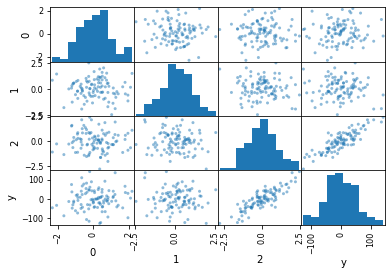

In [10]:
pd.plotting.scatter_matrix(pd1)
plt.show()

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(
     X,y,  random_state=42, test_size=0.10)
 print(len(X_test))   

10


In [12]:
reg = LinearRegression()

In [13]:
reg.fit(X_train,y_train)

LinearRegression()

In [14]:
print(reg.score(X_test, y_test))

0.7413022323186318


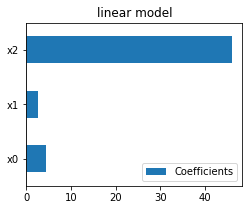

In [15]:
coefs = pd.DataFrame(
    reg.coef_, columns=["Coefficients"], index=['x0', 'x1', 'x2']
)

coefs.plot(kind="barh", figsize=(5, 3))
plt.title("linear model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [16]:
ridg = Ridge(alpha=5.0)
ridg.fit(X_train, y_train)
print(ridg.score(X_test, y_test))

0.7617948202742422


In [17]:
print(ridg.coef_)
print(ridg.intercept_)

[ 3.92773537  2.02327033 43.5750747 ]
-0.8517660317530766


In [18]:
lasso = linear_model.Lasso(alpha=5)
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test))

0.7303276460717574


In [19]:
print(lasso.coef_)
print(lasso.intercept_)

[ 0.          0.         40.46422855]
-0.347213551341218


In [20]:
X_train[0,:]

array([-0.68067814,  0.49233656, -0.05682448])

In [21]:
rp1 =reg.predict([X_train[0]])
rp2= reg.predict([X_train[-1]])
rip1 =ridg.predict([X_train[0]])
rip2= ridg.predict([X_train[-1]])
lap1 =lasso.predict([X_train[0]])
lap2= lasso.predict([X_train[-1]])

In [29]:
print(lap1,lap2)

[-2.64657233] [79.25004121]


In [22]:
ridg.predict([X_train[0]])

array([-5.0052907])

In [23]:
lasso.predict([X_train[0]])

array([-2.64657233])

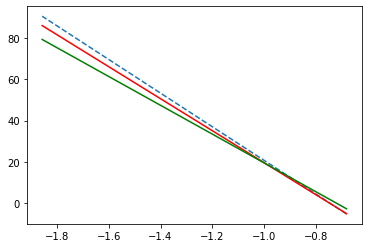

In [30]:
plt.plot([X_train[0,0], X_train[-1,1]] , [rp1, rp2], linestyle= '--')
plt.plot([X_train[0,0], X_train[-1,1]] , [rip1, rip2], linestyle= '-', color ='r')
plt.plot([X_train[0,0], X_train[-1,1]] , [lap1, lap2], linestyle= '-', color ='green')


In [25]:
print(reg.score(X_test, y_test))
print(ridg.score(X_test, y_test))
print(lasso.score(X_test, y_test))

0.7413022323186318
0.7617948202742422
0.7303276460717574


In [26]:
print(reg.coef_)
print(ridg.coef_)
print(lasso.coef_)

[ 4.42252134  2.67684381 46.15888053]
[ 3.92773537  2.02327033 43.5750747 ]
[ 0.          0.         40.46422855]


In [36]:
factreg1 =reg.coef_[0] * X_train[0,0]
factreg2 =reg.coef_[0] * X_train[-1,0]

factridg1 =ridg.coef_[0] * X_train[0,0]
factridg2 =ridg.coef_[0] * X_train[-1,0]

factlasso1 = lasso.coef_[0] * X_train[0,0]
factlasso2 = lasso.coef_[0] * X_train[-1,0]


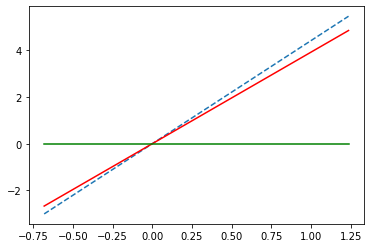

In [37]:
plt.plot([X_train[0,0], X_train[-1,0]] , [factreg1,factreg2], linestyle= '--')
plt.plot([X_train[0,0], X_train[-1,0]] , [factridg1,factridg2], linestyle= '-', color ='r')
plt.plot([X_train[0,0], X_train[-1,0]] , [factlasso1, factlasso2], linestyle= '-', color ='green')
